In [4]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time

In [5]:
def py_matmul(A, B, N):
    result = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            for k in range(N):
                result[i, j] += A[i, k] * B[k, j]
                
    return result


def strassen(x, y):
    
    if x.size == 1 or y.size == 1:
        return x * y

    n = x.shape[0]

    if n % 2 == 1:
        x = np.pad(x, (0, 1), mode='constant')
        y = np.pad(y, (0, 1), mode='constant')

    m = int(np.ceil(n / 2))
    
    a = x[: m, : m]
    b = x[: m, m:]
    c = x[m:, : m]
    d = x[m:, m:]
    e = y[: m, : m]
    f = y[: m, m:]
    g = y[m:, : m]
    h = y[m:, m:]
    
    p1 = strassen(a, f - h)
    p2 = strassen(a + b, h)
    p3 = strassen(c + d, e)
    p4 = strassen(d, g - e)
    p5 = strassen(a + d, e + h)
    p6 = strassen(b - d, g + h)
    p7 = strassen(a - c, e + f)
    
    result = np.zeros((2 * m, 2 * m), dtype=np.int32)
    
    result[: m, : m] = p5 + p4 - p2 + p6
    result[: m, m:] = p1 + p2
    result[m:, : m] = p3 + p4
    result[m:, m:] = p1 + p5 - p3 - p7

    return result[: n, : n]

In [9]:
def plotting(data, N, label):
    plt.figure(figsize=(10,5))
    plt.xlabel('Matrix size', fontsize=16)
    plt.ylabel('Time, sec', fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.plot(data, N, label=label, linewidth=5)
    plt.legend(fontsize=16)
    plt.grid(True)

In [7]:
python_time = []
N_array = []
t_final = 0
N = 1

while t_final < 15:    
    A, B = np.random.rand(N,N), np.random.rand(N,N)
    
    t0 = time.perf_counter()
    py_matmul(A, B, N)
    t_final = time.perf_counter()-t0
    python_time.append(t_final)
    
    N_array.append(N)
    N += 10

print(N_array[-1])

311


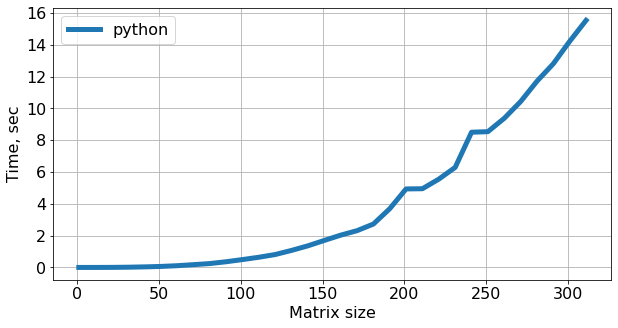

In [10]:
plotting(N_array, python_time, label='python')

In [11]:
torch_time = []
N_array = []
t_final = 0
N = 1

while t_final < 15:     
    A, B = np.random.rand(N,N), np.random.rand(N,N)
    
    t0 = time.perf_counter()
    torch.matmul(torch.from_numpy(A), torch.from_numpy(B))
    t_final = time.perf_counter()-t0
    torch_time.append(t_final)
    
    N_array.append(N)
    N += 50
    
print(N_array[-1])

9351


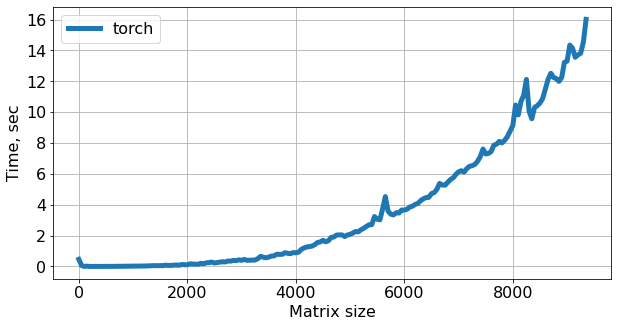

In [12]:
plotting(N_array, torch_time, label='torch')

In [13]:
numpy_time = []
N_array = []
t_final = 0
N = 1

while t_final < 15:     
    A, B = np.random.rand(N,N), np.random.rand(N,N)
    
    t0 = time.perf_counter()
    np.matmul(A, B)
    t_final = time.perf_counter()-t0
    numpy_time.append(t_final)
    
    N_array.append(N)
    N += 50
    
print(N_array[-1])

9301


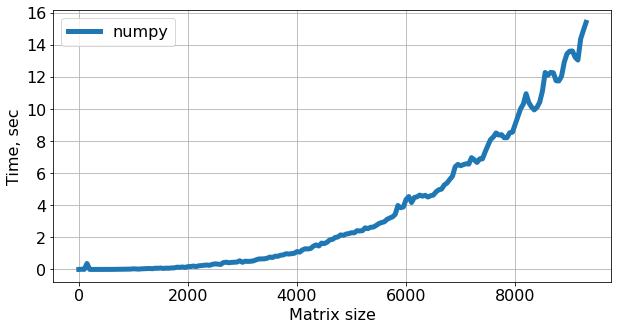

In [14]:
plotting(N_array, numpy_time, label='numpy')

In [15]:
str_time = []
N_array = []
t_final = 0
N = 1

while t_final < 15:     
    A, B = np.random.rand(N,N), np.random.rand(N,N)
    
    t0 = time.perf_counter()
    strassen(A, B)
    t_final = time.perf_counter()-t0
    str_time.append(t_final)
    
    N_array.append(N)
    N += 10
    
print(N_array[-1])

131


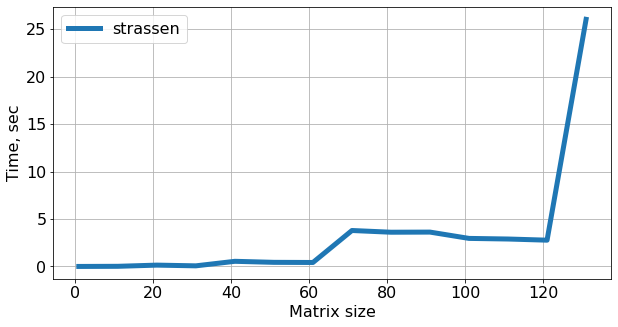

In [16]:
plotting(N_array, str_time, label='strassen')